In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLV', 'XLY', 'XLU', 'XLRE', 'XLC']
prices = yf.download(tickers, start = '2010-01-01', end = '2020-12-31')['Close']

prices.dropna(inplace=True)

prices.head()

C:\Users\anair26\AppData\Local\Temp\ipykernel_33320\2919939680.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start = '2010-01-01', end = '2020-12-31')['Close']
[*********************100%***********************]  11 of 11 completed


Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2018-06-19,50.676605,46.785191,54.391651,23.865799,64.921265,66.629044,42.327557,24.852901,40.213203,75.310684,104.431412
2018-06-20,50.511974,47.365776,54.631813,23.804720,64.965584,66.768936,42.369003,25.121155,40.245258,75.470421,104.926567
2018-06-21,49.974800,47.075481,53.620243,23.734909,64.149963,66.255913,42.451897,25.271061,40.381470,75.035583,104.179146
2018-06-22,50.702583,47.281506,54.690025,23.621473,64.371613,66.041382,42.800072,25.491980,40.661888,75.372803,104.001640
2018-06-25,49.914150,46.307590,53.591145,23.368416,63.555988,64.670166,43.015606,25.428858,41.334911,74.680565,101.740746


In [ ]:
normalized_prices = prices / prices.iloc[0] 

pair_list = []
for i in range(len(tickers)):
    for j in range(i + 1, len(tickers)):  # avoid duplicates and self-pairs
        pair_list.append((tickers[i], tickers[j]))

pair_distances = []
for etf1, etf2 in pair_list:
    distance = np.sqrt(np.sum((normalized_prices[etf1] - normalized_prices[etf2]) ** 2))
    pair_distances.append({'Pair': f'{etf1}-{etf2}', 'Distance': distance})

distance_df = pd.DataFrame(pair_distances).sort_values(by='Distance')

distance_df = distance_df[:13]

distance_df


,Pair,Distance
42,XLP-XLU,1.509985
9,XLB-XLC,1.586493
52,XLU-XLRE,1.591179
40,XLP-XLV,1.601810
2,XLB-XLI,1.606400
43,XLP-XLRE,1.783383
51,XLY-XLC,1.837138
19,XLF-XLI,2.023952
45,XLV-XLY,2.127865
33,XLI-XLC,2.300201


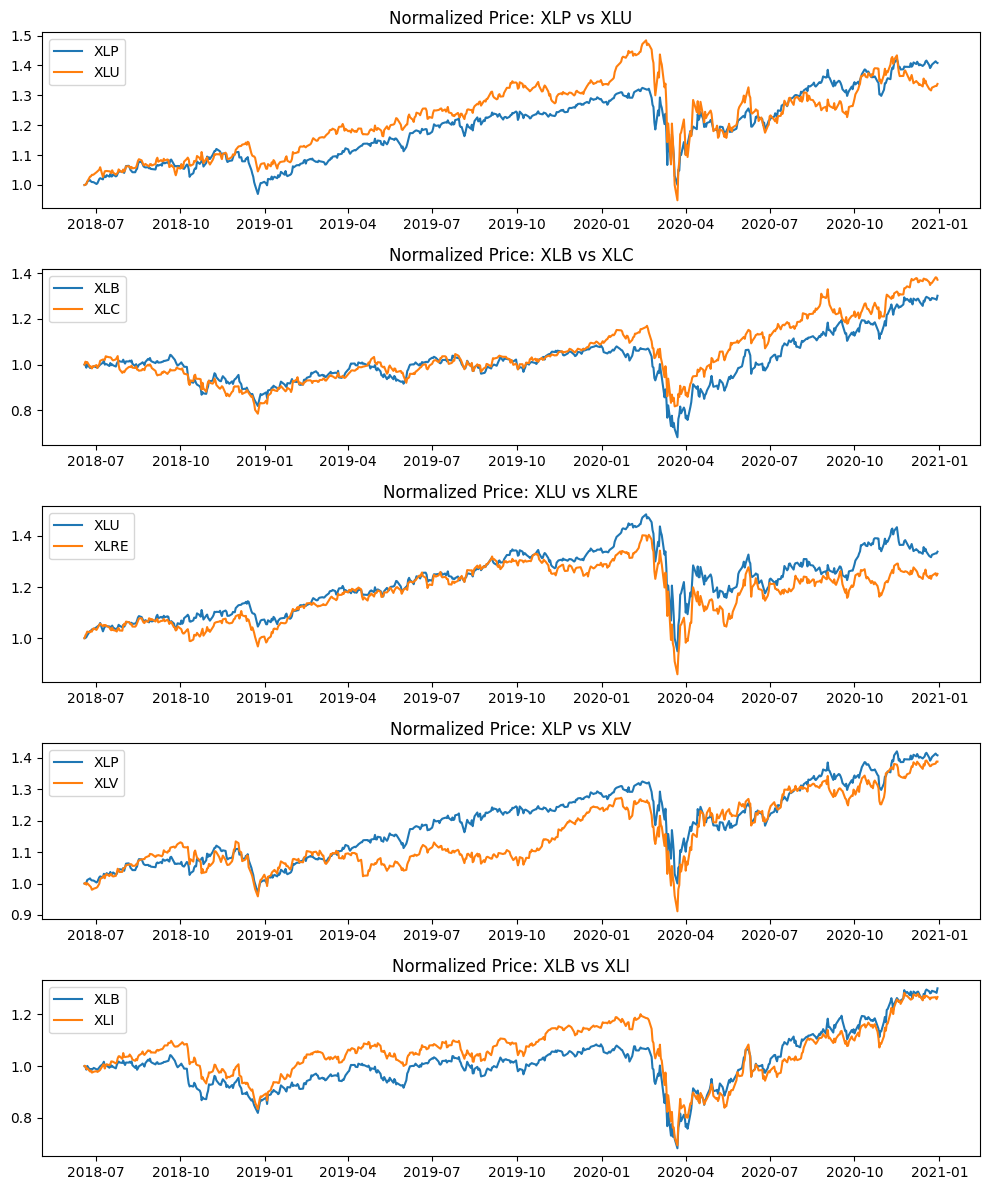

In [5]:
top_5_pairs = distance_df.head(5)['Pair'].tolist()
fig, axs = plt.subplots(len(top_5_pairs), 1, figsize=(10, 12))
for i, pair in enumerate(top_5_pairs):
    etf1, etf2 = pair.split('-')
    axs[i].plot(normalized_prices[etf1], label=etf1)
    axs[i].plot(normalized_prices[etf2], label=etf2)
    axs[i].set_title(f'Normalized Price: {etf1} vs {etf2}')
    axs[i].legend()
plt.tight_layout()
plt.show()